## Introduction ..

This notebook presents my trail to solve WUZZUF competition hereunder .. 

https://www.kaggle.com/WUZZUF/wuzzuf-job-posts/data

This competition dataset is a sample of jobs posted on WUZZUF and the corresponding applications, mainly during 2014 and 2015

This notebook is structured as follows:

1. Loading Data sets
2. Exploring Data
        2.1. Numerical Exploration
        2.2. Uni-Variate Analysis
        2.3. Bi-Variate Analysis
3. Cleaning Data 
        3.1. Filling NAs
        3.2. Manipulating Typo
4. Creating Dashboard
5. Listing of Set of Insights
6. Limitations (i.e. implementation that is excepected to be done if I still have time :) )

In [1]:
## data manipulation
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from scipy import stats

## reading the data 
import json
import zipfile
import csv

from collections import Counter

# ## plotting .. 
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline

from datetime import datetime

import operator 


## warnings
import warnings
warnings.filterwarnings("ignore")

## 1. Loading Data sets:

### 1. Applications Dataset:

In [2]:
df_app = pd.read_csv('Wuzzuf_Applications_Sample.csv')

In [3]:
df_app.head()

,id,user_id,job_id,app_date
0,ba7b8f17,846d013c,516e4ed,2014-01-01 07:27:52
1,30e1ae86,9d5e32c5,516e4ed,2014-01-01 08:20:42
2,d829a6b7,eb26a291,516e4ed,2014-01-01 10:30:37
3,3f985f37,7b5e68a8,516e4ed,2014-01-01 10:55:07
4,27e1695,76fa79b1,516e4ed,2014-01-01 11:00:26


In [4]:
np.shape(df_app)

(1854190, 4)

There are 1854190 applications in this dataset .. each of which contains 4 columns (i.e. id, user_id, job_id, and application_date)

What is the type of each variable .. 

In [5]:
df_app.columns.to_series().groupby(df_app.dtypes).groups

{dtype('O'): Index([u'id', u'user_id', u'job_id', u'app_date'], dtype='object')}

### Comment ..
ALL variables are considered (Categorical) .. 

And this makes sence except for app_date variable .. that has to be a date_time ! ..  

Are there any null values in this dataset ?!

In [6]:
df_app.isnull().any().any()

False

NO ! :)

Let's double check .. 

In [7]:
df_app.isnull().sum()

id          0
user_id     0
job_id      0
app_date    0
dtype: int64

Confirmed ! :) ..

None of the columns contains null values ..

### 2. Job Posts Dataset:

In [8]:
df_job = pd.read_csv('Wuzzuf_Job_Posts_Sample.csv', encoding='utf-8') 

In [9]:
df_job.head()

,id,city,job_title,job_category1,job_category2,job_category3,job_industry1,job_industry2,job_industry3,salary_minimum,salary_maximum,num_vacancies,career_level,experience_years,post_date,views,job_description,job_requirements,payment_period,currency
0,516e4ed,Ciro,Sales & Marketing Agent,Sales/Retail/Business Development,Marketing,Select,Telecommunications Services,Select,Select,2000,3500,8,Entry Level,0-1,2014-01-01 06:01:41,2602,<p><strong>Qualifications</strong>:<br /><br /...,NaN,Per Month,Egyptian Pound
1,a361ef59,Cairo,German Training Coordinator,Customer Service/Support,Administration,Human Resources,Translation and Localization,Business Services - Other,Education,1000,5000,8,Entry Level,0-2,2014-01-01 20:01:18,2213,<p>&bull;Placing jobs' ads on various websites...,NaN,Per Month,Egyptian Pound
2,7226ce78,Cairo,Junior Software Developer,IT/Software Development,Select,Select,Computer Software,Select,Select,2000,2500,1,Entry Level,2,2014-01-02 11:01:03,2940,"<span style=""text-decoration: underline;""><str...",NaN,Per Month,Egyptian Pound
3,f4b2bcd6,Cairo,Application Support Engineer,IT/Software Development,Select,Select,Telecommunications Services,Select,Select,2000,3500,1,Entry Level,1-2,2014-01-02 12:01:23,2042,"<strong><span style=""text-decoration: underlin...",NaN,Per Month,Egyptian Pound
4,3fee6f73,Alexandria,Electrical Maintenance Engineer,Engineering,Select,Select,Food and Beverage Production,Select,Select,5000,8000,1,Experienced (Non-Manager),1-3,2014-01-21 13:45:56,5684,Job Title: Electrical Maintenance Engineer<br ...,NaN,Per Month,Egyptian Pound


In [10]:
np.shape(df_job)

(21850, 20)

### Comment ..
There are about 21850 applications for different jobs .. and about 20 columns .. 

Let's check the names of these columns ..

In [11]:
df_job.columns

Index([u'id', u'city', u'job_title', u'job_category1', u'job_category2',
       u'job_category3', u'job_industry1', u'job_industry2', u'job_industry3',
       u'salary_minimum', u'salary_maximum', u'num_vacancies', u'career_level',
       u'experience_years', u'post_date', u'views', u'job_description',
       u'job_requirements', u'payment_period', u'currency'],
      dtype='object')

What is the data type of each variable ?!

In [12]:
df_job.columns.to_series().groupby(df_job.dtypes).groups

{dtype('int64'): Index([u'salary_minimum', u'salary_maximum', u'num_vacancies', u'views'], dtype='object'),
 dtype('O'): Index([u'id', u'city', u'job_title', u'job_category1', u'job_category2',
        u'job_category3', u'job_industry1', u'job_industry2', u'job_industry3',
        u'career_level', u'experience_years', u'post_date', u'job_description',
        u'job_requirements', u'payment_period', u'currency'],
       dtype='object')}

### Comment ..
There are 4 integer variables .. and 16 categorical variables .. 

Let's check if any of them is null !

In [13]:
df_job.isnull().any()

id                  False
city                False
job_title           False
job_category1       False
job_category2       False
job_category3       False
job_industry1       False
job_industry2       False
job_industry3       False
salary_minimum      False
salary_maximum      False
num_vacancies       False
career_level        False
experience_years    False
post_date           False
views               False
job_description      True
job_requirements     True
payment_period       True
currency             True
dtype: bool

### Comment .. 
4 variables contain null values ! .. let's count these values to check if they matter !

In [14]:
df_job.isnull().sum()

id                     0
city                   0
job_title              0
job_category1          0
job_category2          0
job_category3          0
job_industry1          0
job_industry2          0
job_industry3          0
salary_minimum         0
salary_maximum         0
num_vacancies          0
career_level           0
experience_years       0
post_date              0
views                  0
job_description      274
job_requirements    2633
payment_period         5
currency               5
dtype: int64

### Comment .. 
both (payment_period) and (currency) have only 5 missing cells in each .. 

Followed by job_description that contains 274 missing cells .. 

However, (job_requirements) contains 2633 missing value of of 21850 .. which is a little bit huge number ! 

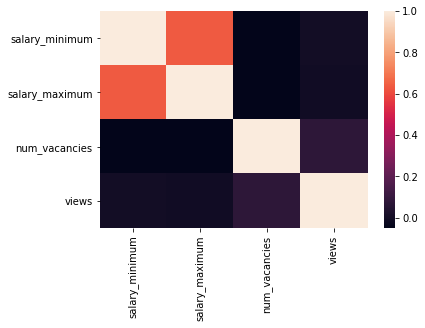

In [15]:
## heatmap
corr = df_job.corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values)

In [16]:
cmap=sns.diverging_palette(5, 250, as_cmap=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "9pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '11pt'})\
    .set_precision(2)\
    .set_table_styles(magnify())

,salary_minimum,salary_maximum,num_vacancies,views
salary_minimum,1,0.64,-0.05,-0.00073
salary_maximum,0.64,1,-0.048,-0.0012
num_vacancies,-0.05,-0.048,1,0.077
views,-0.00073,-0.0012,0.077,1


In [17]:
np.corrcoef([df_job.salary_minimum, df_job.salary_maximum, df_job.num_vacancies, df_job.views])

array([[  1.00000000e+00,   6.36124766e-01,  -5.02982450e-02,
         -7.29620187e-04],
       [  6.36124766e-01,   1.00000000e+00,  -4.81621058e-02,
         -1.22877948e-03],
       [ -5.02982450e-02,  -4.81621058e-02,   1.00000000e+00,
          7.68507898e-02],
       [ -7.29620187e-04,  -1.22877948e-03,   7.68507898e-02,
          1.00000000e+00]])

## Comment .. 
From the heatmap and correlation results above .. the following can be concluded .. 

1. There is some how strong linear relationship between minimum salary and maximum salary for the applicants .. 
2. The correlation between minimum salary and both number of vacancies and jobs views is very weak ! 
3. The correlation is a bit higher in case of maximum salary .. yet it is a weak correlation ..

## 2. Exploring Data:

### 2.1. Numerical Exploration:

In [18]:
df_app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1854190 entries, 0 to 1854189
Data columns (total 4 columns):
id          object
user_id     object
job_id      object
app_date    object
dtypes: object(4)
memory usage: 56.6+ MB


ALL columns in applications data set are categorical ! 

In [19]:
## applications data set
df_app.describe()

,id,user_id,job_id,app_date
count,1854190,1854190,1854190,1854190
unique,1854190,314460,19208,1824859
top,a6be3aae,4ca790ab,949a3cf2,2015-12-08 21:24:54
freq,1,802,2306,4


In [20]:
# job post data set 
df_job.describe()

,salary_minimum,salary_maximum,num_vacancies,views
count,21850.000000,21850.000000,21850.000000,21850.000000
mean,3333.283982,5476.040412,5.856934,1376.874737
std,5293.894787,10783.029504,16.633904,1065.109847
min,0.000000,0.000000,1.000000,0.000000
25%,1500.000000,2500.000000,1.000000,797.000000
50%,2500.000000,4000.000000,1.000000,1230.000000
75%,3500.000000,6000.000000,3.000000,1791.000000
max,250000.000000,1000000.000000,100.000000,37568.000000


### 2.2. Univariate Analysis: 

Let's analyze each variable graphically .. 

Text(0.5,1,u'Frequency of Job Categories Count in Members Data Set')

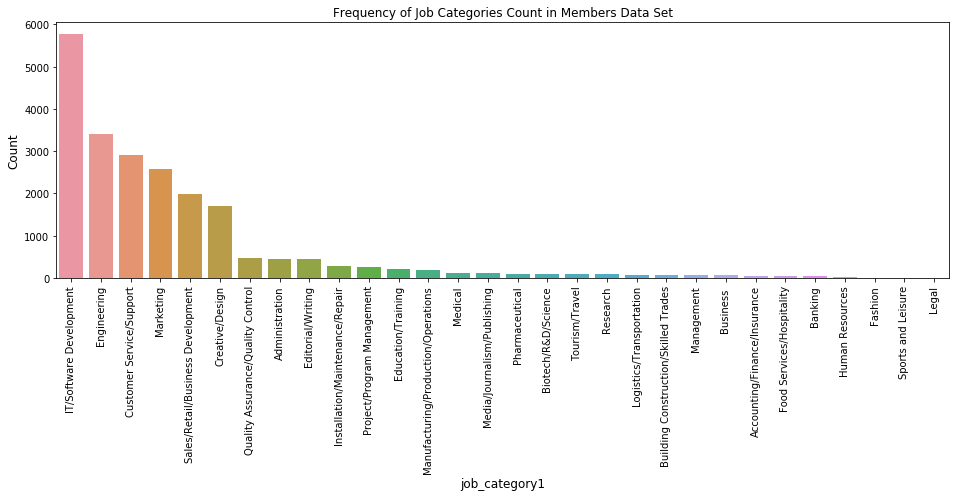

In [21]:
# Job Category1

plt.figure(figsize=(16,16))
plt.subplot(311)
sns.countplot(x = "job_category1", data = df_job, order = df_job.job_category1.value_counts().iloc[:].index)
plt.xticks(rotation=90)
plt.ylabel('Count', fontsize=12)
plt.xlabel('job_category1', fontsize=12)
plt.title("Frequency of Job Categories Count in Members Data Set", fontsize=12)

In [22]:
job_cat = Counter(df_job['job_category1']).most_common(10)
job_cat

[(u'IT/Software Development', 5762),
 (u'Engineering', 3405),
 (u'Customer Service/Support', 2917),
 (u'Marketing', 2590),
 (u'Sales/Retail/Business Development', 1998),
 (u'Creative/Design', 1712),
 (u'Quality Assurance/Quality Control', 474),
 (u'Administration', 459),
 (u'Editorial/Writing', 458),
 (u'Installation/Maintenance/Repair', 287)]

the most frequent job category within the 1st set of categories is "IT/Software Development" that appears 5762 times .. 

the least term is "Legal" that appears only 4 times .. 

As illustrated from the above chart and count for job categories .. there is big diffrence between the number occurances of each categoty .. 

Hence, I think it's better to visualize only the top i.e. 7 categories .. given that the difference after 5 is a bit small 

Text(0.5,1,u'Frequency of Job Categories Count in Members Data Set')

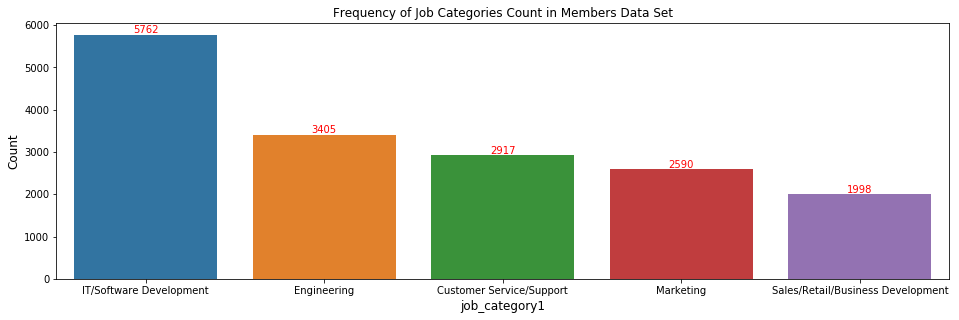

In [23]:
# Job Category1 .. top 5 values 

plt.figure(figsize=(16,16))
plt.subplot(311)
sns.countplot(x = 'job_category1', data = df_job, order = df_job['job_category1'].value_counts().nlargest(5).iloc[:].index)
# plt.xticks(rotation=70)

# show labels 
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=10, color='red', ha='center', va='bottom')
    
plt.ylabel('Count', fontsize=12)
plt.xlabel('job_category1', fontsize=12)
plt.title("Frequency of Job Categories Count in Members Data Set", fontsize=12)

"IT/Software Development" is the 1st category that has the highest count (i.e. searched frequently)

Text(0.5,1,u'Frequency of job Titles Count in Members Data Set')

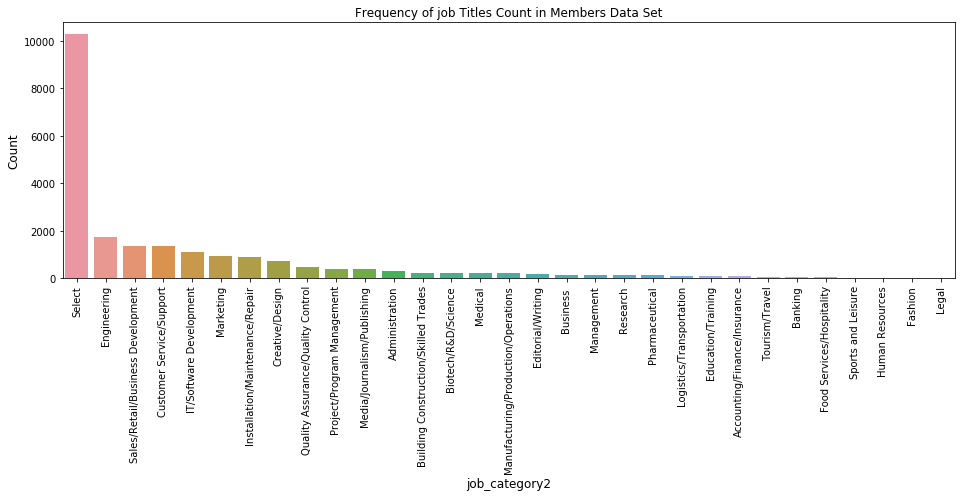

In [24]:
# job_category2

plt.figure(figsize=(16,16))
plt.subplot(311)
sns.countplot(x = "job_category2", data = df_job, order = df_job.job_category2.value_counts().iloc[:].index)
plt.xticks(rotation=90)
plt.ylabel('Count', fontsize=12)
plt.xlabel('job_category2', fontsize=12)
plt.title("Frequency of job Titles Count in Members Data Set", fontsize=12)

In [25]:
job_cat = Counter(df_job['job_category2']).most_common(10)
job_cat

[(u'Select', 10259),
 (u'Engineering', 1716),
 (u'Sales/Retail/Business Development', 1351),
 (u'Customer Service/Support', 1330),
 (u'IT/Software Development', 1077),
 (u'Marketing', 926),
 (u'Installation/Maintenance/Repair', 904),
 (u'Creative/Design', 702),
 (u'Quality Assurance/Quality Control', 481),
 (u'Project/Program Management', 399)]

The job category of "Select" appears the most in the dataset of 10259.. followed by "Engineering" that appears 1716 times
and the least number of jobs categories goes to "Legal" 

Text(0.5,1,u'Frequency of Job Categories Count in Members Data Set')

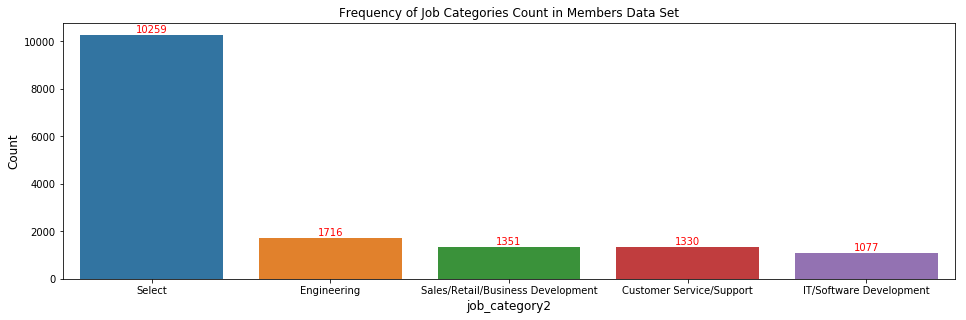

In [26]:
# Job Category2 .. top 5 values 
# only top 5 is enough given the small difference between the categories except the 1st 

plt.figure(figsize=(16,16))
plt.subplot(311)
sns.countplot(x = 'job_category2', data = df_job, order = df_job['job_category2'].value_counts().nlargest(5).iloc[:].index)
# plt.xticks(rotation=90)

# show labels 
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=10, color='red', ha='center', va='bottom')
    
    
plt.ylabel('Count', fontsize=12)
plt.xlabel('job_category2', fontsize=12)
plt.title("Frequency of Job Categories Count in Members Data Set", fontsize=12)

"IT/Software Development" ranks the 3rd in this category .. while the highest number of searches go to "Select"

Text(0.5,1,u'Frequency of Job Categories Count in Members Data Set')

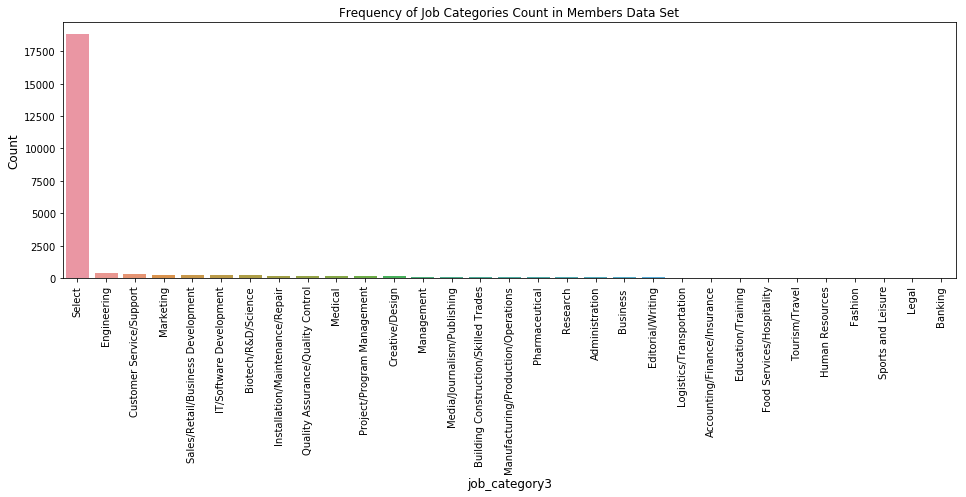

In [27]:
# job category3

plt.figure(figsize=(16,16))
plt.subplot(311)
sns.countplot(x = "job_category3", data = df_job, order = df_job.job_category3.value_counts().iloc[:].index)
plt.xticks(rotation=90)
plt.ylabel('Count', fontsize=12)
plt.xlabel('job_category3', fontsize=12)
plt.title("Frequency of Job Categories Count in Members Data Set", fontsize=12)

In [28]:
job_cat = Counter(df_job['job_category3']).most_common(10)
job_cat

[(u'Select', 18788),
 (u'Engineering', 356),
 (u'Customer Service/Support', 313),
 (u'Marketing', 255),
 (u'Sales/Retail/Business Development', 244),
 (u'IT/Software Development', 203),
 (u'Biotech/R&D/Science', 197),
 (u'Installation/Maintenance/Repair', 191),
 (u'Quality Assurance/Quality Control', 139),
 (u'Medical', 137)]

Wow ! .. 

The job category of "Select" appears in the 3rd category column more than within the 2nd category .. of 18788 times ..

the least word is "Banking" that appears only 3 times .. compared to 53 times within the 2nd category and 42 within the 1st set of categories 

Text(0.5,1,u'Frequency of Job Categories Count in Members Data Set')

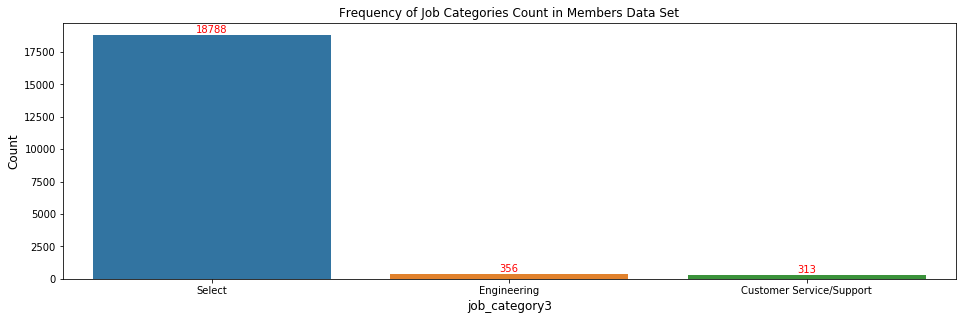

In [29]:
# Job Category3 .. top 3 values 
# only top 3 is enough given the small difference between the categories except the 1st 

plt.figure(figsize=(16,16))
plt.subplot(311)
sns.countplot(x = 'job_category3', data = df_job, order = df_job['job_category3'].value_counts().nlargest(3).iloc[:].index)
# plt.xticks(rotation=90)

# show labels 
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=10, color='red', ha='center', va='bottom')
    
    
plt.ylabel('Count', fontsize=12)
plt.xlabel('job_category3', fontsize=12)
plt.title("Frequency of Job Categories Count in Members Data Set", fontsize=12)

"Select" also ranks the highest in this category .. while "IT/Software Development" fails to be between the top 3 searches .. 

In [30]:
# job_title

job_tit = Counter(df_job['job_title']).most_common(10)
job_tit

[(u'Graphic Designer', 363),
 (u'Call Center Agent', 204),
 (u'Social Media Specialist', 178),
 (u'Sales Engineer', 171),
 (u'Web Developer', 146),
 (u'Marketing Specialist', 130),
 (u'Customer Service Representative', 129),
 (u'Web Designer', 127),
 (u'PHP Developer', 127),
 (u'Customer Service Agent', 116)]

The most frequent job title in this data set is "Graphic Designer" that appears 363 while the least is "Mechanical / Electrical Engineer" that appears only 3 times .. 

Text(0.5,1,u'Frequency of Job Title Count in Members Data Set')

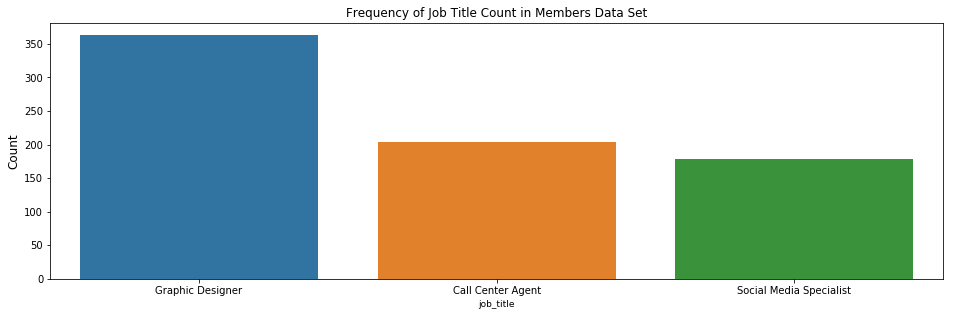

In [31]:
# job_industry1

plt.figure(figsize=(16,16))
plt.subplot(311)
sns.countplot(x = "job_title", data = df_job, order = df_job.job_title.value_counts().nlargest(3).iloc[:].index)
# plt.xticks(rotation=90)
plt.ylabel('Count', fontsize = 12)
plt.xlabel('job_title', fontsize = 9)
plt.title("Frequency of Job Title Count in Members Data Set", fontsize=12)

Text(0.5,1,u'Frequency of Job Indusrty Count in Members Data Set')

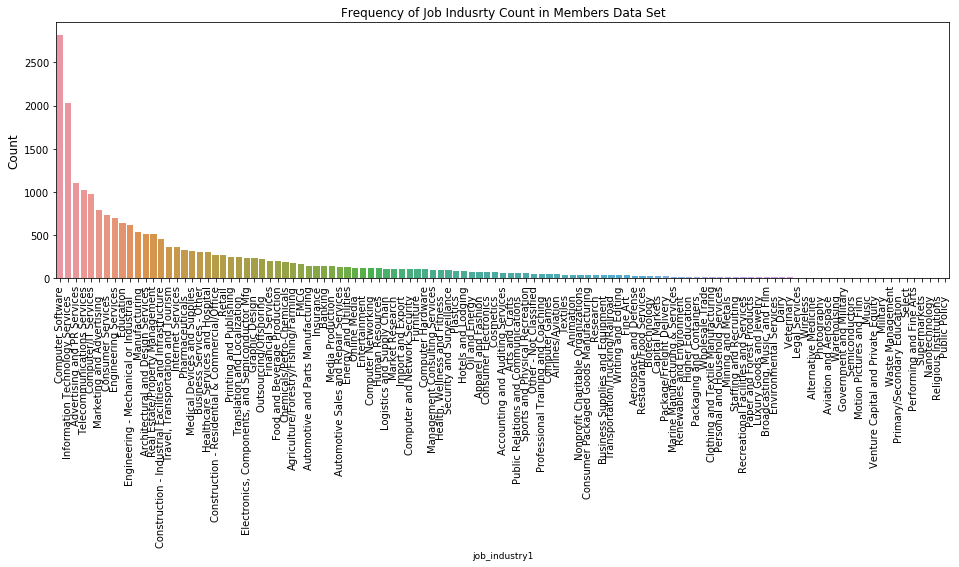

In [32]:
# job_industry1

plt.figure(figsize=(16,16))
plt.subplot(311)
sns.countplot(x = "job_industry1", data = df_job, order = df_job.job_industry1.value_counts().iloc[:].index)
plt.xticks(rotation=90)
plt.ylabel('Count', fontsize = 12)
plt.xlabel('job_industry1', fontsize = 9)
plt.title("Frequency of Job Indusrty Count in Members Data Set", fontsize=12)

wow ! .. 

It seems there are a lot of job industries within the data set .. 

In [33]:
job_ind = Counter(df_job['job_industry1']).most_common(10)
job_ind

[(u'Computer Software', 2824),
 (u'Information Technology Services   ', 2029),
 (u'Advertising and PR Services', 1108),
 (u'Telecommunications Services', 1021),
 (u'Computer/IT Services', 976),
 (u'Marketing and Advertising   ', 795),
 (u'Consumer Services   ', 727),
 (u'Engineering Services', 692),
 (u'Education', 634),
 (u'Engineering - Mechanical or Industrial   ', 616)]

'Computer Software' appears the most in the 1st set of job industries .. while 'Religious Institutions' appears single time .. 

Text(0.5,1,u'Frequency of Job Industry Count in Members Data Set')

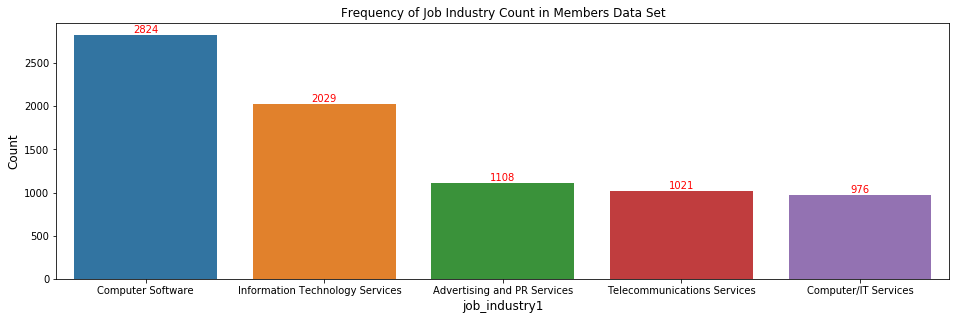

In [34]:
# job_industry1 .. top 5 values 
# although the there are small diffrences in the value count .. ! 

plt.figure(figsize=(16,16))
plt.subplot(311)
sns.countplot(x = 'job_industry1', data = df_job, order = df_job['job_industry1'].value_counts().nlargest(5).iloc[:].index)
# plt.xticks(rotation=90)

# show labels 
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=10, color='red', ha='center', va='bottom')
    
    
plt.ylabel('Count', fontsize=12)
plt.xlabel('job_industry1', fontsize=12)
plt.title("Frequency of Job Industry Count in Members Data Set", fontsize=12)

Text(0.5,1,u'Frequency of Job Indusrty Count in Members Data Set')

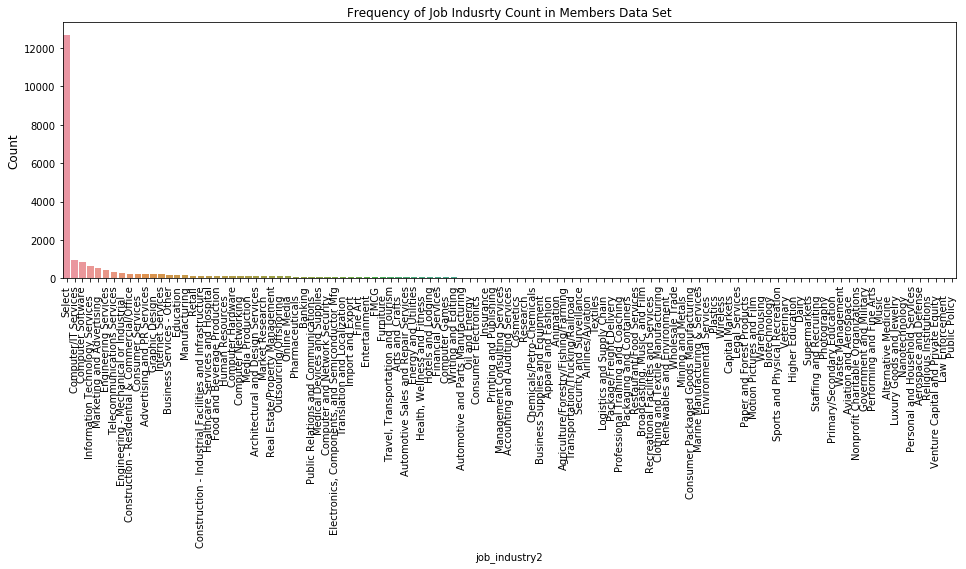

In [35]:
# job_industry2

plt.figure(figsize=(16,16))
plt.subplot(311)
sns.countplot(x = "job_industry2", data = df_job, order = df_job.job_industry2.value_counts().iloc[:].index)
plt.xticks(rotation=90)
plt.ylabel('Count', fontsize=12)
plt.xlabel('job_industry2', fontsize=10)
plt.title("Frequency of Job Indusrty Count in Members Data Set", fontsize=12)

very sparse data ! .. 

In [36]:
job_ind = Counter(df_job['job_industry2']).most_common(10)
job_ind

[(u'Select', 12701),
 (u'Computer/IT Services', 943),
 (u'Computer Software', 847),
 (u'Information Technology Services   ', 631),
 (u'Marketing and Advertising   ', 542),
 (u'Engineering Services', 417),
 (u'Telecommunications Services', 335),
 (u'Engineering - Mechanical or Industrial   ', 275),
 (u'Construction - Residential & Commercial/Office', 241),
 (u'Consumer Services   ', 228)]

The sparsity in the data within this columns comes from the gao between the highest and lowest job industry .. 

Select is the highest with count of 12701 while the least is also 'Religious Institutions' that appears single time as well .. 

Text(0.5,1,u'Frequency of Job Industry Count in Members Data Set')

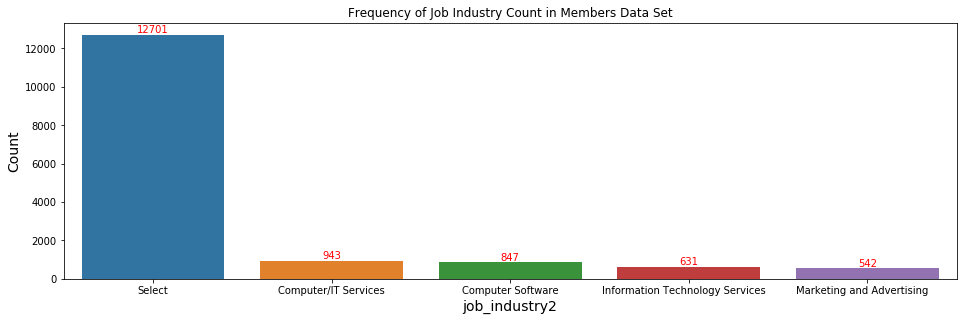

In [37]:
# job_industry2 .. top 5 values 
# given the small diffrences in the value count 

plt.figure(figsize=(16,16))
plt.subplot(311)
sns.countplot(x = 'job_industry2', data = df_job, order = df_job['job_industry2'].value_counts().nlargest(5).iloc[:].index)
# plt.xticks(rotation=75)
# show labels 
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=10, color='red', ha='center', va='bottom')
    
plt.ylabel('Count', fontsize=14)
plt.xlabel('job_industry2', fontsize=14)
plt.title("Frequency of Job Industry Count in Members Data Set", fontsize=12)

Text(0.5,1,u'Frequency of Job Indusrty Count in Members Data Set')

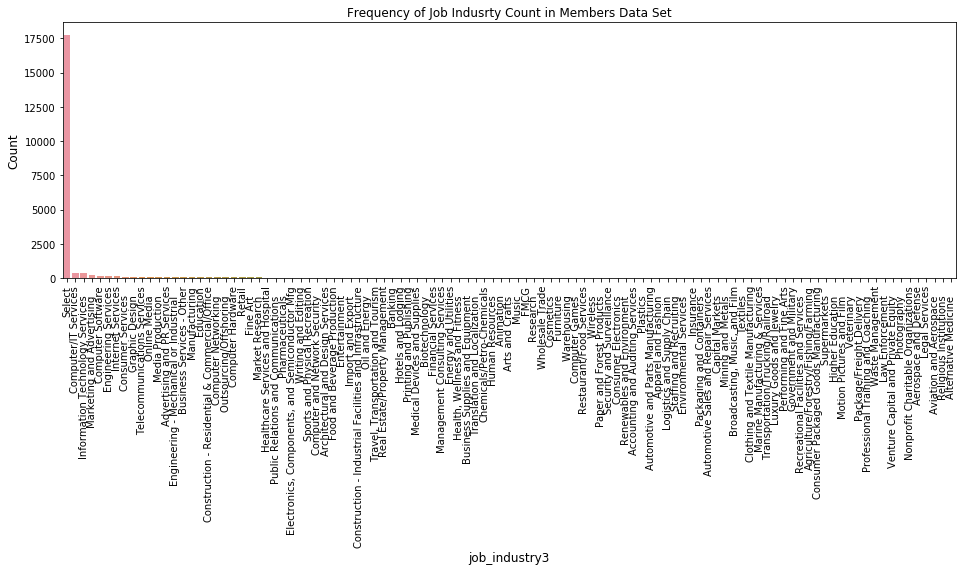

In [38]:
# job_industry3

plt.figure(figsize=(16,16))
plt.subplot(311)
sns.countplot(x = "job_industry3", data = df_job, order = df_job.job_industry3.value_counts().iloc[:].index)
plt.xticks(rotation=90)
plt.ylabel('Count', fontsize=12)
plt.xlabel('job_industry3', fontsize=12)
plt.title("Frequency of Job Indusrty Count in Members Data Set", fontsize=12)

The sparsity in the third list is even more severe ! .. 

let's check the counts ..

In [39]:
job_ind = Counter(df_job['job_industry3']).most_common(10)
job_ind

[(u'Select', 17776),
 (u'Computer/IT Services', 381),
 (u'Information Technology Services   ', 379),
 (u'Marketing and Advertising   ', 230),
 (u'Computer Software', 193),
 (u'Engineering Services', 185),
 (u'Internet Services', 133),
 (u'Consumer Services   ', 103),
 (u'Graphic Design   ', 101),
 (u'Telecommunications Services', 101)]

'Select' is also on top with a count of 17776 .. 'Religious Institutions' still at the end with a count of one !

Text(0.5,1,u'Frequency of Job Industry Count in Members Data Set')

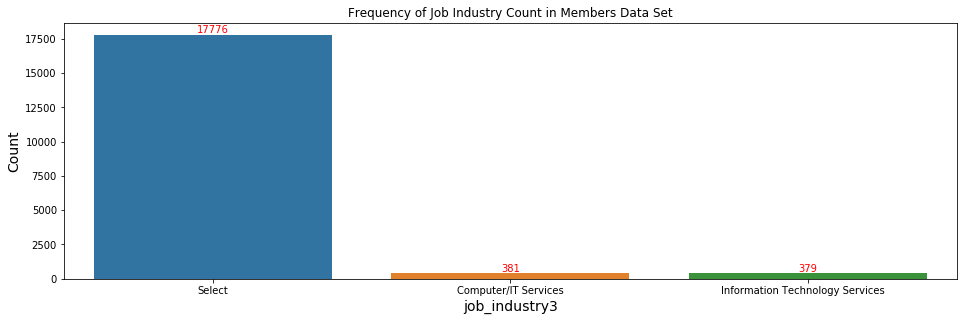

In [40]:
# job_industry3 .. top 3 values  

plt.figure(figsize=(16,16))
plt.subplot(311)
sns.countplot(x = 'job_industry3', data = df_job, order = df_job['job_industry3'].value_counts().nlargest(3).iloc[:].index)
# plt.xticks(rotation=75)

# show labels 
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=10, color='red', ha='center', va='bottom')
    
plt.ylabel('Count', fontsize=14)
plt.xlabel('job_industry3', fontsize=14)
plt.title("Frequency of Job Industry Count in Members Data Set", fontsize=12)

In [41]:
## most common industries ..
job_ind = pd.concat([df_job['job_industry1'], df_job['job_industry2'], df_job['job_industry3']])
job_ind.head()

0        Telecommunications Services
1    Translation and Localization   
2                  Computer Software
3        Telecommunications Services
4       Food and Beverage Production
dtype: object

Text(0.5,1,u'Frequency of Job Industry Count in Members Data Set')

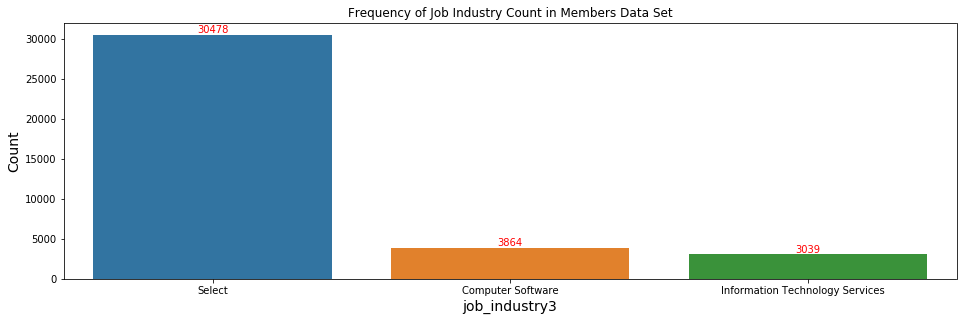

In [42]:
# # job_industry3 .. top 3 values  

plt.figure(figsize=(16,16))
plt.subplot(311)
sns.countplot(x = job_ind, data = df_job, order = job_ind.value_counts().nlargest(3).iloc[:].index)
# plt.xticks(rotation=75)

# show labels 
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=10, color='red', ha='center', va='bottom')
    
plt.ylabel('Count', fontsize=14)
plt.xlabel('job_industry3', fontsize=14)
plt.title("Frequency of Job Industry Count in Members Data Set", fontsize=12)

Text(0.5,1,u'Frequency of Career Level Count in Members Data Set')

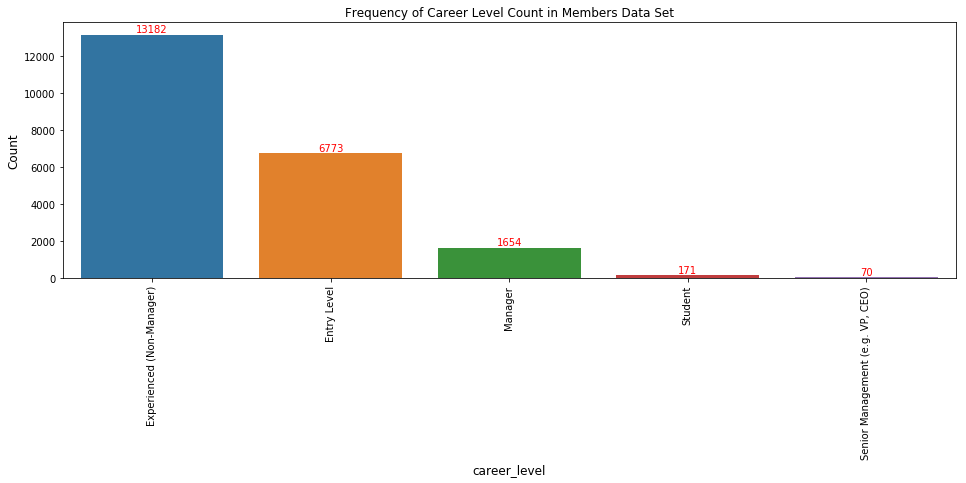

In [43]:
# career_level

plt.figure(figsize=(16,16))
plt.subplot(311)
sns.countplot(x = "career_level", data = df_job, order = df_job.career_level.value_counts().iloc[:].index) 

# show labels 
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=10, color='red', ha='center', va='bottom')
    
plt.xticks(rotation=90)
plt.ylabel('Count', fontsize=12)
plt.xlabel('career_level', fontsize=12)
plt.title("Frequency of Career Level Count in Members Data Set", fontsize=12)

The majority of the career levels in Wuzzuf data set is from "Experienced (Non-Managers)" .. followed by "Entry Level" and the least number of applications are related to Senior Management (i.e. CEO)  

In [44]:
# job_requirements

job_ind = Counter(df_job['job_requirements']).most_common()
job_ind = pd.DataFrame(job_ind)
job_ind.head(3)

,0,1
0,NaN,2633
1,<ul>\r\n<li>Fluent or very good English skills...,38
2,<strong>How to qualify:<br /></strong><br />\r...,25


Job requierements column contains pragraph for each job .. in also, contains 2633 job application without requirements .. !

Text(0.5,1,u'Frequency of Payment Period Count in Members Data Set')

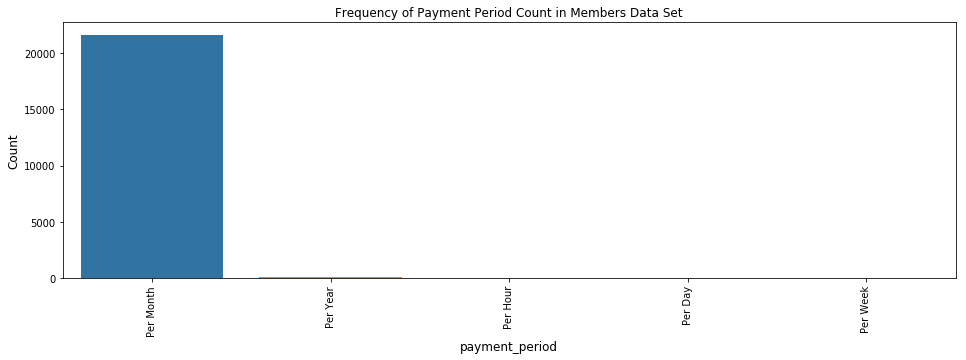

In [45]:
# payment_period

plt.figure(figsize=(16,16))
plt.subplot(311)
sns.countplot(x = "payment_period", data = df_job, order = df_job.payment_period.value_counts().iloc[:].index)
plt.xticks(rotation=90)
plt.ylabel('Count', fontsize=12)
plt.xlabel('payment_period', fontsize=12)
plt.title("Frequency of Payment Period Count in Members Data Set", fontsize=12)

Almost all the jobs pay per month for their employess .. except very few jobs pay per year ! .. 

We can make further analysis to check the titles of those jobs .. 

In [46]:
job_pay = Counter(df_job['payment_period']).most_common()
job_pay

[(u'Per Month', 21642),
 (u'Per Year', 123),
 (u'Per Hour', 59),
 (u'Per Day', 18),
 (nan, 5),
 (u'Per Week', 3)]

OMG ! .. 

It seems that the chart above doesn't accurate enough to plot all the types .. may be due to the gap between the highest 
payment peiod and the rest .. 

Yet, the majority take their salaries per month and only three applications' salaries are per week .. 

5 rows are empty with NAs values ..

Text(0.5,1,u'Frequency of Currency Count in Members Data Set')

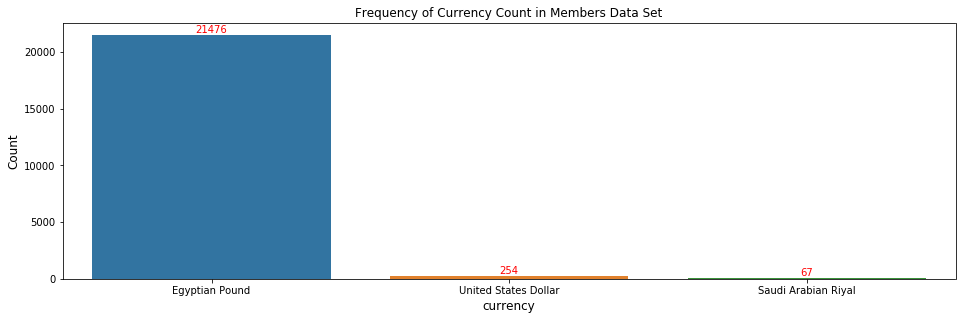

In [47]:
#currency

plt.figure(figsize=(16,16))
plt.subplot(311)
sns.countplot(x = "currency", data = df_job, order = df_job.currency.value_counts().nlargest(3).iloc[:].index)
# plt.xticks(rotation=90)

# show labels 
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=10, color='red', ha='center', va='bottom')
    
plt.ylabel('Count', fontsize=12)
plt.xlabel('currency', fontsize=12)
plt.title("Frequency of Currency Count in Members Data Set", fontsize=12)

More than 20000 applications pay their salaries by EGP and only few pay by USD .. 

In [48]:
job_pay = Counter(df_job['currency']).most_common()
job_pay

[(u'Egyptian Pound', 21476),
 (u'United States Dollar', 254),
 (u'Saudi Arabian Riyal', 67),
 (u'U.A. Emirates Dirham', 16),
 (u'Euro', 11),
 (nan, 5),
 (u'Qatari Riyal', 5),
 (u'Canadian Dollar', 4),
 (u'Jordanian Dinar', 2),
 (u'Indian Rupee', 2),
 (u'British Pound', 2),
 (u'Kuwaiti Dinar', 1),
 (u'Ethiopian Birr', 1),
 (u'Ghanaian Cedis', 1),
 (u'Ecuadoran Sucre', 1),
 (u'Dominican Republic Pesos', 1),
 (u'East Caribbean Dollar', 1)]

Again .. the numerical count is more accurate as it lists the count of each corresponding currency .. 

Precisely 21576 applications pay using EGP, and single application pay by 'Kuwaiti Dinar' .. the same case is for 'Ethiopian Birr', 'Ghanaian Cedis', 'Ecuadoran Sucre', 'Dominican Republic Pesos' and 'East Caribbean Dollar' as well ..

Also, 5 rows are empty .. each of which is corresponding to job application that are not stated its currency .. 

In [49]:
# city

job_city = Counter(df_job['city']).most_common()
job_city

[(u'Cairo', 14988),
 (u'Giza', 3886),
 (u'Alexandria', 989),
 (u'6th of October', 90),
 (u'Mansoura', 89),
 (u'New Cairo', 85),
 (u'10th of Ramadan', 81),
 (u'Any', 60),
 (u'Giza / Cairo', 45),
 (u'Ismailia', 39),
 (u'10th of ramadan city', 36),
 (u'Cairo / Giza', 36),
 (u'6th of October City', 35),
 (u'Tanta', 32),
 (u'nasr city', 32),
 (u'menoufia', 31),
 (u'6 October', 30),
 (u'\u0627\u0644\u0642\u0627\u0647\u0631\u0629', 29),
 (u'10th of Ramdan City', 26),
 (u'Suez', 26),
 (u'6 of October', 24),
 (u'Hurghada', 22),
 (u'Assuit', 20),
 (u'Obour city', 20),
 (u'maadi', 20),
 (u'all', 19),
 (u'Nasr City, Cairo', 19),
 (u'cairo, giza', 19),
 (u'Ismalia', 18),
 (u'Cairo/ Giza', 16),
 (u'Egypt', 14),
 (u'Alexandria & Cairo', 13),
 (u'ASWAN', 12),
 (u'alex', 12),
 (u'Port Said', 12),
 (u'Cairo & alexandria', 12),
 (u'Cairo - Giza', 12),
 (u'6th october', 12),
 (u'Qalyubia', 12),
 (u'\u0627\u0644\u062c\u064a\u0632\u0629', 11),
 (u'All over Egypt', 11),
 (u'red sea', 11),
 (u'Upper Egypt', 1

It seems there are typo in this column .. i.e. the field of (\xd9\x85\xd8\xaf\xd9\x8a\xd9\x86\xd9\x87 \xd9\x86\xd8\xb5\xd8\xb1) ! .. this is invalid city name !  ..

Meanwhile, the most frequent city is Cairo .. that appears 14988 times within the data set, while both 'Tanta - Mounfia -Mansoura' appear only one time in the data .. 

### Bivariate analysis: 

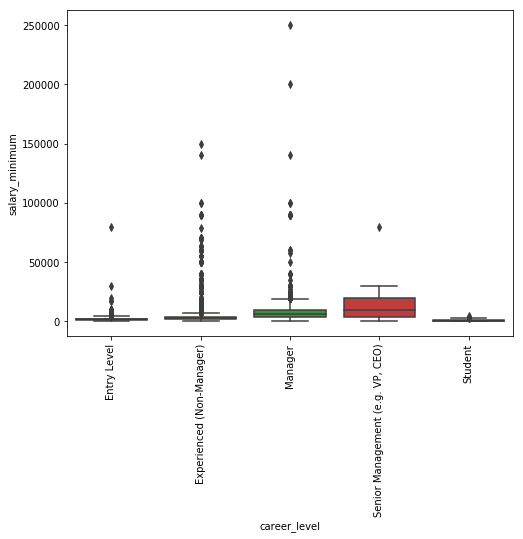

In [50]:
# min_salary vs career level

df_sal_career = pd.concat([df_job['salary_minimum'], df_job['career_level']], axis = 1)
f, ax = plt.subplots(figsize=(8, 6))
plt.xticks(rotation=90)
fig = sns.boxplot(x = 'career_level', y = "salary_minimum", data = df_sal_career)

The range of minimum_salaries for "Senior Management - i.e. CEO" is high and contains single outlier .. 

However, the range of values for the rest of career_level types is smaller, yet, contains a lot of outliers except for (Manager) type.

The type of career_level that has the least minimum_salary is "Student" 

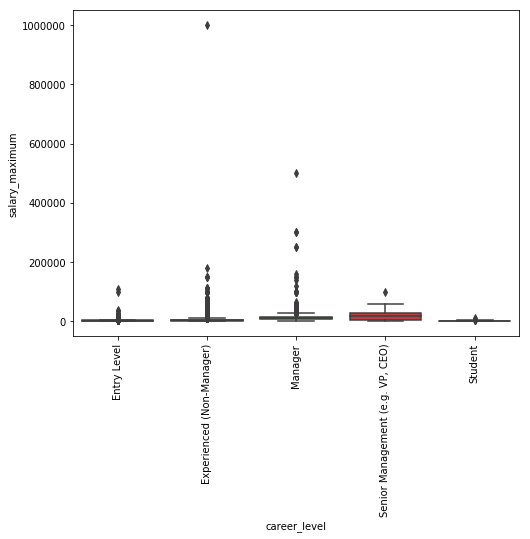

In [51]:
# max_salary vs career level

df_sal_career = pd.concat([df_job['salary_maximum'], df_job['career_level']], axis = 1)
f, ax = plt.subplots(figsize=(8, 6))
plt.xticks(rotation=90)
fig = sns.boxplot(x = 'career_level', y = "salary_maximum", data = df_sal_career)

The disperssion of values for "Senior Management" in case of maximum_salaries is less than for minimum_salaries .. however, it still has the maximum range of values within all other career_levels .. 

Meanwhile, experienced (non_managers) type has a lot of outliers especially that one of (1000,000) .. 

Yet, "student" has the minimum salary values 

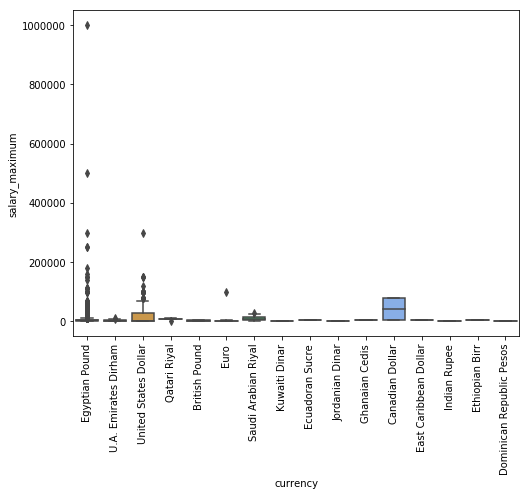

In [52]:
# maximum vs currency

df_max_career = pd.concat([df_job['salary_maximum'], df_job['currency']], axis = 1)
f, ax = plt.subplots(figsize=(8, 6))
plt.xticks(rotation=90)
fig = sns.boxplot(x = 'currency', y = "salary_maximum", data = df_max_career)

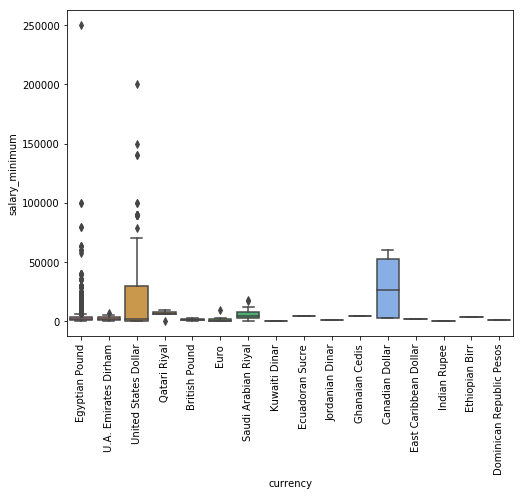

In [53]:
# minimum vs currency 

df_min_career = pd.concat([df_job['salary_minimum'], df_job['currency']], axis = 1)
f, ax = plt.subplots(figsize=(8, 6))
plt.xticks(rotation=90)
fig = sns.boxplot(x = 'currency', y = "salary_minimum", data = df_min_career)

The dispersion of minimum values is in general higher than of maximum values .. especially for USD, Canadian Dollar and Saudi Arabian Riyal .. 

that are scattered over higher range of values with lots of outliers in case of USD ..

EGP still suffers from huge number of outliers .. 

### Post_date:
Post_date variable is in the form of date_time .. it will be hard working on it in this format .. 

let's extract day, month and year from this variable and check if there is a relation between those montioned (i.e. day, month or year) and the other variables .. i.e. is there certain year has peak in either minimum or maximum salaries ?! ..  

In [54]:
df_job['post_year'] = pd.DatetimeIndex(df_job['post_date']).year
df_job['post_year'].unique()

array([2014, 2016, 2015])

This is expected :D .. the data set contains records from 2014 to 2016 published jobs ..  

In [55]:
df_job['post_month'] = pd.DatetimeIndex(df_job['post_date']).month
df_job['post_month'].unique()

array([ 1,  2,  3, 10,  4,  5,  8,  6,  7,  9, 11, 12])

There are posts related to every month within the year .. !

In [56]:
df_job['post_day'] = pd.DatetimeIndex(df_job['post_date']).day
df_job['post_day'].unique()

array([ 1,  2, 21,  3,  5,  4,  6, 30, 16, 10, 12,  9,  7,  8, 11, 13, 14,
       15, 17, 19, 18, 20, 25, 22, 23, 27, 24, 26, 29, 28, 31])

It seems we have posts on a daily basis within the month ..

Let's check if the applications are within the same years .. 

In [57]:
df_app['post_app'] = pd.DatetimeIndex(df_app['app_date']).year
df_app['post_app'].unique()

array([2014, 2015, 2016, 2017])

They are not ! .. 

the applications are from 2014 to 2017 .. 

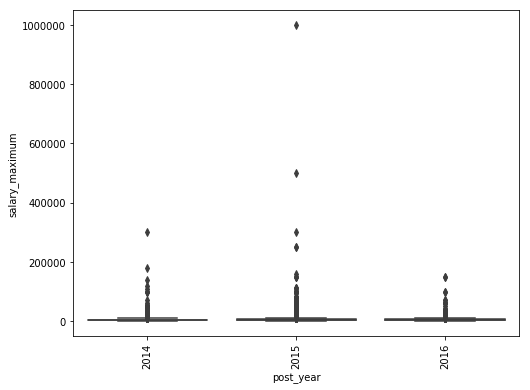

In [58]:
# max_salary vs post_year

df_sal_career = pd.concat([df_job['salary_maximum'], df_job['post_year']], axis = 1)
f, ax = plt.subplots(figsize=(8, 6))
plt.xticks(rotation=90)
fig = sns.boxplot(x = 'post_year', y = "salary_maximum", data = df_sal_career)

The dispersion of maximum salaries is the highest in 2015 .. and the lowest in 2016 .. 

However, in general the three years suffer from outliers .. 

Let's check if the same pattern exists for the (range of salary values .. i.e. maximum - minimum) 

Yet, before doing this .. let's check if there is a relationship between minimum and maximum salaries .. 

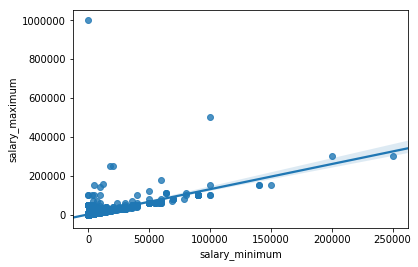

In [59]:
## min vs max salaries

sns.regplot(df_job['salary_minimum'], df_job['salary_maximum'])

### Comment .. 

There is a positive linear relationship between minimum and maximum salaries .. that is whenever the minimum salary increases the maximum is also increases .. 

and it is obvious that we still have that 1000,000 salary value stands there on top ! .. 

Hence, let's work on the range of values (i.e. max - min) instead of repeating the plotting process twice (once for min and another for max salary values) 

In [60]:
df_job['salary_range'] = df_job['salary_maximum'] - df_job['salary_minimum']
df_job['salary_range'].head()

0    1500
1    4000
2     500
3    1500
4    3000
Name: salary_range, dtype: int64

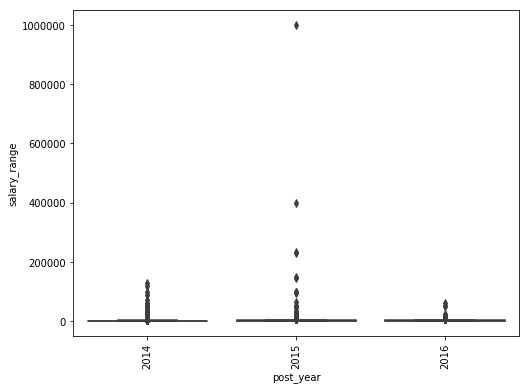

In [61]:
# salary_range vs post_year

df_sal_career = pd.concat([df_job['salary_range'], df_job['post_year']], axis = 1)
f, ax = plt.subplots(figsize=(8, 6))
plt.xticks(rotation=90)
fig = sns.boxplot(x = 'post_year', y = "salary_range", data = df_sal_career)

wow ! .. 

It seems we have variations in salaries in 2015 ! .. 

Lots of outliers are there especially that point on 1000,000 ..

Meanwhile, the number of outliers and dispersion of them are less in 2014 and 2016 for the range of salaries compared to maximum salaries .. 

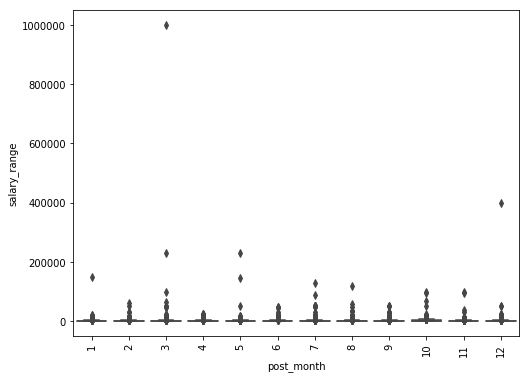

In [62]:
# salary_range vs post_month

df_sal_career = pd.concat([df_job['salary_range'], df_job['post_month']], axis = 1)
f, ax = plt.subplots(figsize=(8, 6))
plt.xticks(rotation=90)
fig = sns.boxplot(x = 'post_month', y = "salary_range", data = df_sal_career)

Voila ! :D .. 

The huge salary range post of 1000,000 occurs in March .. we also have another less severe outlier in December .. followed by May, and Jan .. 

The salaries in April are a bit clustered with no extreme outliers ..  

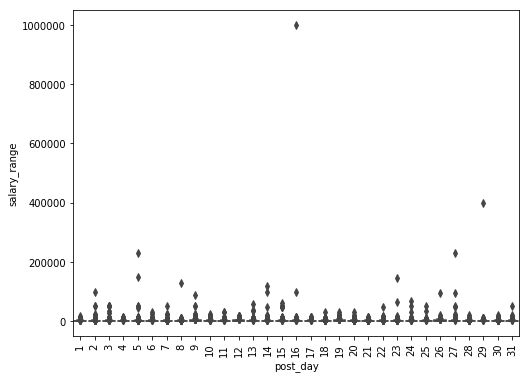

In [63]:
# salary_range vs post_day

df_sal_career = pd.concat([df_job['salary_range'], df_job['post_day']], axis = 1)
f, ax = plt.subplots(figsize=(8, 6))
plt.xticks(rotation=90)
fig = sns.boxplot(x = 'post_day', y = "salary_range", data = df_sal_career)

Precisely, this unique post of 1000,000 occurs in 16th March :D .. 

There are other higher range of salaries post in 29th ..   

We may breakdown the analysis futher to check the time of each post .. and I think this might be of any usefulness cause it might indicate which time within the day the posts of high salaries are published ! ..  

In [64]:
df_job['post_hour'] = pd.DatetimeIndex(df_job['post_date']).hour
df_job['post_hour'].unique()

array([ 6, 20, 11, 12, 13, 17, 15, 16, 14, 19, 18, 23, 21,  5, 10,  0,  1,
        9,  8, 22,  7,  2,  3,  4])

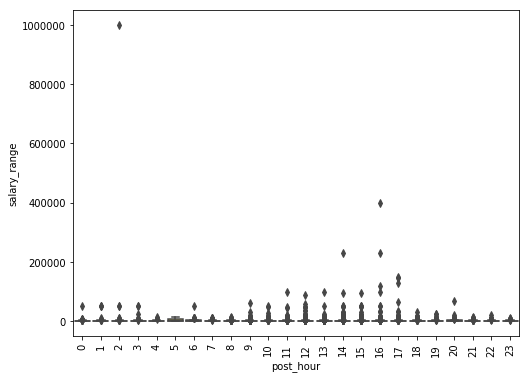

In [65]:
# salary_range vs post_hour

df_sal_career = pd.concat([df_job['salary_range'], df_job['post_hour']], axis = 1)
f, ax = plt.subplots(figsize=(8, 6))
plt.xticks(rotation=90)
fig = sns.boxplot(x = 'post_hour', y = "salary_range", data = df_sal_career)

:) out intersting post was published at 2:00 am ..

There are outliers at 16 and less severe one at 14 .. and it seems we have odd pattern ar 5:00   

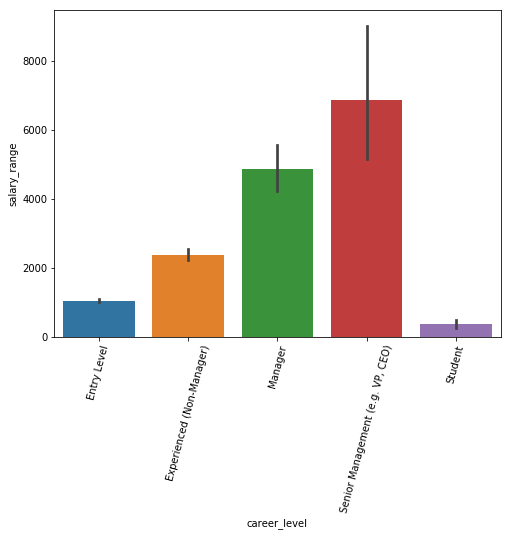

In [66]:
# min_salary vs career level

df_sal_career = pd.concat([df_job['salary_range'], df_job['career_level']], axis = 1)
f, ax = plt.subplots(figsize=(8, 6))
plt.xticks(rotation=75)
fig = sns.barplot(x = 'career_level', y = "salary_range", data = df_sal_career)

"Senior Manager i.e. cEO) is the one who has the maximum salary range .. followed by Manager .. 

"Student" career level has the least salary range ..  

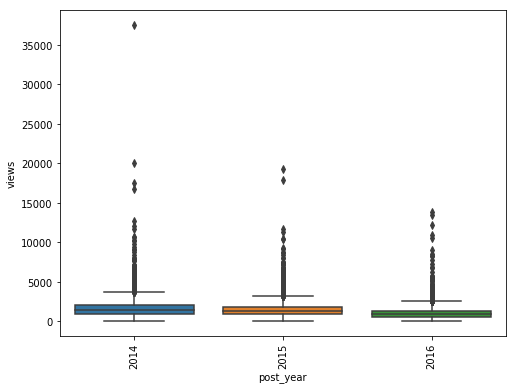

In [67]:
## job views vs  year 

df_sal_career = pd.concat([df_job['views'], df_job['post_year']], axis = 1)
f, ax = plt.subplots(figsize=(8, 6))
plt.xticks(rotation=90)
fig = sns.boxplot(x = 'post_year', y = "views", data = df_sal_career)

In general the number of viewers in 2016 is fewer than the other years with less variability and fewer number of outliers .. 

The maximum number of outliers occured in 2014 especially that point of greater than 35000 views !

The above charts only help us idetifying the outliers within the data components (i.e. year, month and day) .. 

however, if we want to check the change of another variable (i.e. number of views) vs this data components .. we should visualize it using line chart .. 

Let's give it a try :) 

## Questions: 
Below are some bivariate analysis plots answer set of questions ...


### 1. Which career level has the maximum range of salary ?!
Career_level vs Salary_range .. 

In [68]:
career_salary = df_job.loc[df_job.salary_range.notnull(),:].groupby("career_level").agg({"salary_range":{"Meansalary":np.mean}})
career_salary.sort_values(by=("salary_range","Meansalary"),inplace=True)
career_salary.reset_index(inplace=True)
career_salary.career_level = df_job.career_level.astype("category", categories=[i for i in df_job.career_level.unique()],ordered=False)
career_salary

,career_level,salary_range
,,Meansalary
0,Entry Level,353.947368
1,Entry Level,1044.391555
2,Entry Level,2362.636322
3,Entry Level,4873.224909
4,Experienced (Non-Manager),6863.614286


mmmm experienced (Non manager) position has the maximum average salary range .. 

I think there is a mistake ! .. all career levels types has to be reported in the above chart + experienced level (i.e. CEO) is expected to be on top !

## 2. Do we have a relationship between job posts year and range of salaries?!


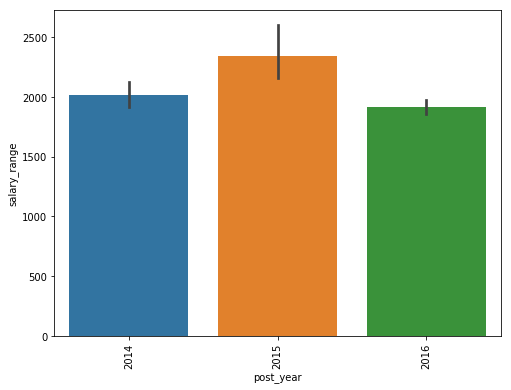

In [70]:
# salary_range vs post_year

df_sal_career = pd.concat([df_job['salary_range'], df_job['post_year']], axis = 1)
f, ax = plt.subplots(figsize=(8, 6))
plt.xticks(rotation=90)
fig = sns.barplot(x = 'post_year', y = "salary_range", data = df_sal_career)

It seems we have peak in salaries range in 2015 ! ..

It is a bit disappointing to have the least salary ranges in 2016 ! .. 

Let's plot minimum and maximum salaries in those years to double check ..

## 3. Is there a relationship between minimum and maximum salary levels?!

Yes, there is .. shown in the above scatter plot with increasing trend .. 

## 4. Is the data tell any information about supply, demand relationship?!


There are many indicators might influance this relationship .. 

Includes (job-titles and views) relationship .. number of vacancies and views ..
and Also, observing how many applications receive for every post .. 

In [69]:
view = df_job.loc[df_job.views.notnull(),:].groupby("job_title").agg({"views":{"MeanViews":np.mean}})
view.sort_values(by=("views","MeanViews"),inplace=True)
view.reset_index(inplace=True)
view.job_title = df_job.job_title.astype("category", categories=[i for i in df_job.job_title.unique()],ordered=False)
view.tail()

,job_title,views
,,MeanViews
10436,Call Center Quality Controller,12040.0
10437,Communication Engineer,13656.0
10438,Industrial Purchasing Head,13806.0
10439,Linux & UNIX Trainer/Instructor,17949.0
10440,Deputy General Manager - Engineering,19292.0


"Deputy General Manager - Engineering" is the position with the highest average number of viewers ! .. 

followed by "Linux & UNIX Trainer/Instructor" ... 

This contrudicts the results in the excel sheet .. as this chart depends on the mean value of the views while in the excel .. it depends on the count of those views ..  

## 5. Do we still have growth opportunities?!

Drawing line charts for each year (x axis is months) .. vs range of salaries (or even number of posts) .. 

In [134]:
## line chart views vs month of each year .. 

In fact .. the next step is to do bivariate analysis .. 

however, I'm gonna perform data cleaning step prior to the bivariate .. so that the bivariate analysis is performed on a cleaned version for all the columns .. 


## 3. Data Cleaning: 

So far, as mentioned above .. some columns contains NAs and some others contains typo (invalid cell value) .. 

### 3.1. Filling NAs .. 
Let's clean them up starting with the four variables contain NAs (i.e. job_description, job_requirements, payment_period and currency)

In [72]:
# job_description 

job_desc = Counter(df_job['job_description']).most_common()
job_desc = pd.DataFrame(job_desc)
job_desc.head(3)

,0,1
0,NaN,274
1,<ul>\r\n<li>Responsible for taking inbound cal...,30
2,<strong>Benefits:</strong><br />\r\n<ul>\r\n<l...,25


274 missing value .. 

I can fill these missing cells by the mode of the variable as this is a categorical variable ..

However, this makes none sense .. dut to the nature of the variable that is a description of each job that is almost unique for similar jobs (i.e. all "Data Analysts" jobs might share some common descriptions in their posts) .. 

Hence, I'll try to group the posts by (job title) and then fill in the NAs in the description column based on the job title

In [73]:
# df_job.groupby('job_title').groups

In [74]:
# job requirements NAs 

In [75]:
# payment_period 

job_payment = Counter(df_job['payment_period']).most_common()
job_payment

[(u'Per Month', 21642),
 (u'Per Year', 123),
 (u'Per Hour', 59),
 (u'Per Day', 18),
 (nan, 5),
 (u'Per Week', 3)]

In [76]:
df_job['payment_period'] = df_job.fillna(df_job.payment_period.mode(), inplace=True)

In [77]:
df_job['payment_period'].isnull().any().any() # check if NAs are there !

False

It is done :D ..

payment_period variable is a categorical variable that has (Per month) as the most frequent period .. 

this is why the NAs are filled by this most frequent value .. and now the variable hasn't got any missing values.

In [78]:
# payment_period 

job_currency = Counter(df_job['currency']).most_common()
job_currency

[(u'Egyptian Pound', 21476),
 (u'United States Dollar', 254),
 (u'Saudi Arabian Riyal', 67),
 (u'U.A. Emirates Dirham', 16),
 (u'Euro', 11),
 (nan, 5),
 (u'Qatari Riyal', 5),
 (u'Canadian Dollar', 4),
 (u'Jordanian Dinar', 2),
 (u'Indian Rupee', 2),
 (u'British Pound', 2),
 (u'Kuwaiti Dinar', 1),
 (u'Ethiopian Birr', 1),
 (u'Ghanaian Cedis', 1),
 (u'Ecuadoran Sucre', 1),
 (u'Dominican Republic Pesos', 1),
 (u'East Caribbean Dollar', 1)]

Only 5 NAs .. 

We can remove them as these are just 5 rows out of > 21000 rows in total .. 

however, let's fill them with the mode so that the data is complete ! 

In [79]:
df_job['currency'] = df_job.fillna(df_job.currency.mode(), inplace=True)

In [80]:
df_job['currency'].isnull().any().any()

False

Voila :D ..

The currency variable is now complete without any missing values .. 

### 3.2. Manipulating typo !

#### ==> City variable .. 

(city) variable contains invalid values in some cells as stated above in the univariate analysis .. 

as this is a categorical variable .. we can replace these invalid cells with the (mode) of the columns .. that is the most frequent city within the whole column (i.e. Cairo) or even remove the rows contain these cells .. let's decide after counting their values ..

After checking their values (from the univariate analysis above for the "city" variable) .. I think it's better not to remove them as they have large number ! .. Yet, it's better to be replaced and the common feature in them is that all of them contain this symbol (\) .. hence, let's search for this symbol and replace its cell with the mode ..  

In [81]:
df_job.loc[df_job['city'] == '\xd8\xa7\xd9\x84\xd9\x82\xd8\xa7\xd9\x87\xd8\xb1\xd8\xa9'].head(3)

,id,city,job_title,job_category1,job_category2,job_category3,job_industry1,job_industry2,job_industry3,salary_minimum,...,views,job_description,job_requirements,payment_period,currency,post_year,post_month,post_day,salary_range,post_hour


:D .. these odd values are not invalid .. they are written in Arabic :D .. 

mmmm .. there are two paths to be followed:
1. Adjust the manage to be able to figure them out in Arabic .. I think this will be my second choice .. cause even if I could display it in Arabic as is .. this will still give me an error while trying to plot (City) variable .. besides facing double counting (i.e. Cairo will be plotted once .. once as Cairo and another as (القاهرة))

2. Decode the Arabic version to its corresponding English one .. 

#### Converting Arabic cities' names to English ones: 

In [82]:
## Cairo
c1 = df_job['city'].loc[df_job['city'] == '\xd8\xa7\xd9\x84\xd9\x82\xd8\xa7\xd9\x87\xd8\xb1\xd8\xa9'].replace(df_job['city'].loc[df_job['city'] == '\xd8\xa7\xd9\x84\xd9\x82\xd8\xa7\xd9\x87\xd8\xb1\xd8\xa9'], 'Cairo')

c2 = df_job['city'].loc[df_job['city'] == '\xd8\xa7\xd9\x84\xd9\x82\xd8\xa7\xd9\x87\xd8\xb1\xd9\x87'].replace(df_job['city'].loc[df_job['city'] == '\xd8\xa7\xd9\x84\xd9\x82\xd8\xa7\xd9\x87\xd8\xb1\xd9\x87'], 'Cairo')

c3 = df_job['city'].loc[df_job['city'] == '\xd9\x85\xd8\xb5\xd8\xb1'].replace(df_job['city'].loc[df_job['city'] == '\xd9\x85\xd8\xb5\xd8\xb1'], 'Cairo')

# c1_len = df_job.loc[df_job['city'] == '\xd8\xa7\xd9\x84\xd9\x82\xd8\xa7\xd9\x87\xd8\xb1\xd8\xa9'] # to be able to access the index 
# c2_len = df_job.loc[df_job['city'] == '\xd8\xa7\xd9\x84\xd9\x82\xd8\xa7\xd9\x87\xd8\xb1\xd9\x87']

c = pd.concat([c1, c2, c3])

for i in c.index:
    df_job['city'][i] = c.all()

Done :D .. 

It is converted to its English version as the count of Arabic version was 29 and now they are replace by Cairo .. 

Let's do the same with the other Arabic values .. 

In [83]:
df_job.loc[df_job['city'] == '\xd8\xa7\xd9\x84\xd8\xac\xd9\x8a\xd8\xb2\xd8\xa9'].head(3)

,id,city,job_title,job_category1,job_category2,job_category3,job_industry1,job_industry2,job_industry3,salary_minimum,...,views,job_description,job_requirements,payment_period,currency,post_year,post_month,post_day,salary_range,post_hour


In [84]:
## Giza
c1 = df_job['city'].loc[df_job['city'] == '\xd8\xa7\xd9\x84\xd8\xac\xd9\x8a\xd8\xb2\xd8\xa9'].replace(df_job['city'].loc[df_job['city'] == '\xd8\xa7\xd9\x84\xd8\xac\xd9\x8a\xd8\xb2\xd8\xa9'], 'Giza')

c2 = df_job['city'].loc[df_job['city'] == '\xd8\xa7\xd9\x84\xd8\xac\xd9\x8a\xd8\xb2\xd9\x87'].replace(df_job['city'].loc[df_job['city'] == '\xd8\xa7\xd9\x84\xd8\xac\xd9\x8a\xd8\xb2\xd9\x87'], 'Giza')

c = pd.concat([c1, c2])

for i in c.index:
    df_job['city'][i] = c.all()

In [85]:
## 6 October as well ==> '6 \xd8\xa7\xd9\x83\xd8\xaa\xd9\x88\xd8\xa8\xd8\xb1'
## \xd8\xa3\xd9\x83\xd8\xaa\xd9\x88\xd8\xa8\xd8\xb1

df_job.loc[df_job['city'] == '\xd9\x85\xd8\xaf\xd9\x8a\xd9\x86\xd8\xa9 6 \xd8\xa7\xd9\x83\xd8\xaa\xd9\x88\xd9\x8a\xd8\xb1'].head(3)

,id,city,job_title,job_category1,job_category2,job_category3,job_industry1,job_industry2,job_industry3,salary_minimum,...,views,job_description,job_requirements,payment_period,currency,post_year,post_month,post_day,salary_range,post_hour


In [86]:
# October city

c1 = df_job['city'].loc[df_job['city'] == '\xd9\x85\xd8\xaf\xd9\x8a\xd9\x86\xd8\xa9 6 \xd8\xa7\xd9\x83\xd8\xaa\xd9\x88\xd9\x8a\xd8\xb1'].replace(df_job['city'].loc[df_job['city'] == '\xd9\x85\xd8\xaf\xd9\x8a\xd9\x86\xd8\xa9 6 \xd8\xa7\xd9\x83\xd8\xaa\xd9\x88\xd9\x8a\xd8\xb1'], 'October city')
c2 = df_job['city'].loc[df_job['city'] == '\xd8\xa3\xd9\x83\xd8\xaa\xd9\x88\xd8\xa8\xd8\xb1'].replace(df_job['city'].loc[df_job['city'] == '\xd8\xa3\xd9\x83\xd8\xaa\xd9\x88\xd8\xa8\xd8\xb1'], 'October city')
c3 = df_job['city'].loc[df_job['city'] == '6 \xd8\xa7\xd9\x83\xd8\xaa\xd9\x88\xd8\xa8\xd8\xb1'].replace(df_job['city'].loc[df_job['city'] == '6 \xd8\xa7\xd9\x83\xd8\xaa\xd9\x88\xd8\xa8\xd8\xb1'], 'October city')
c4 = df_job['city'].loc[df_job['city'] == '\xd9\x85\xd8\xaf\xd9\x8a\xd9\x86\xd8\xa9 6 \xd8\xa7\xd9\x83\xd8\xaa\xd9\x88\xd8\xa8\xd8\xb1'].replace(df_job['city'].loc[df_job['city'] == '\xd9\x85\xd8\xaf\xd9\x8a\xd9\x86\xd8\xa9 6 \xd8\xa7\xd9\x83\xd8\xaa\xd9\x88\xd8\xa8\xd8\xb1'], 'October city')

c = pd.concat([c1, c2, c3, c4])

for i in c.index:
    df_job['city'][i] = c.all()

In [87]:
df_job.loc[df_job['city'] == '\xd8\xa7\xd9\x84\xd8\xa7\xd8\xb3\xd9\x83\xd9\x86\xd8\xaf\xd8\xb1\xd9\x8a\xd8\xa9'].head(3)

,id,city,job_title,job_category1,job_category2,job_category3,job_industry1,job_industry2,job_industry3,salary_minimum,...,views,job_description,job_requirements,payment_period,currency,post_year,post_month,post_day,salary_range,post_hour


In [88]:
# Alex
c1 = df_job['city'].loc[df_job['city'] == '\xd8\xa7\xd9\x84\xd8\xa7\xd8\xb3\xd9\x83\xd9\x86\xd8\xaf\xd8\xb1\xd9\x8a\xd8\xa9'].replace(df_job['city'].loc[df_job['city'] == '\xd8\xa7\xd9\x84\xd8\xa7\xd8\xb3\xd9\x83\xd9\x86\xd8\xaf\xd8\xb1\xd9\x8a\xd8\xa9'], 'Alexandira')
c2 = df_job['city'].loc[df_job['city'] == '\xd8\xa7\xd9\x84\xd8\xa5\xd8\xb3\xd9\x83\xd9\x86\xd8\xaf\xd8\xb1\xd9\x8a\xd8\xa9'].replace(df_job['city'].loc[df_job['city'] == '\xd8\xa7\xd9\x84\xd8\xa5\xd8\xb3\xd9\x83\xd9\x86\xd8\xaf\xd8\xb1\xd9\x8a\xd8\xa9'], 'Alexandira')

c = c = pd.concat([c1, c2])

for i in c.index:
    df_job['city'][i] = c.all()

In [89]:
df_job.loc[df_job['city'] == '\xd8\xa7\xd9\x84\xd8\xaa\xd8\xac\xd9\x85\xd8\xb9 \xd8\xa7\xd9\x84\xd8\xa3\xd9\x88\xd9\x84'].head(3)

,id,city,job_title,job_category1,job_category2,job_category3,job_industry1,job_industry2,job_industry3,salary_minimum,...,views,job_description,job_requirements,payment_period,currency,post_year,post_month,post_day,salary_range,post_hour


In [90]:
# first settlement
c5 = df_job['city'].loc[df_job['city'] == '\xd8\xa7\xd9\x84\xd8\xaa\xd8\xac\xd9\x85\xd8\xb9 \xd8\xa7\xd9\x84\xd8\xa3\xd9\x88\xd9\x84'].replace(df_job['city'].loc[df_job['city'] == '\xd8\xa7\xd9\x84\xd8\xaa\xd8\xac\xd9\x85\xd8\xb9 \xd8\xa7\xd9\x84\xd8\xa3\xd9\x88\xd9\x84'], 'first settlement')
df_job['city'][14715] = df_job['city'][14793] = c5.all()

In [91]:
df_job.loc[df_job['city'] == '\xd8\xa7\xd8\xa8\xd9\x87\xd8\xa7'].head(3)

,id,city,job_title,job_category1,job_category2,job_category3,job_industry1,job_industry2,job_industry3,salary_minimum,...,views,job_description,job_requirements,payment_period,currency,post_year,post_month,post_day,salary_range,post_hour


In [92]:
# abha .. is a city in Saudi Arabia

c6 = df_job['city'].loc[df_job['city'] == '\xd8\xa7\xd8\xa8\xd9\x87\xd8\xa7'].replace(df_job['city'].loc[df_job['city'] == '\xd8\xa7\xd8\xa8\xd9\x87\xd8\xa7'], 'Abha - Saudi Arabia')
df_job['city'][10210] = c6.all()

In [93]:
df_job.loc[df_job['city'] == '\xd8\xa7\xd9\x84\xd9\x85\xd9\x86\xd8\xb5\xd9\x88\xd8\xb1\xd8\xa9'].head(3)

,id,city,job_title,job_category1,job_category2,job_category3,job_industry1,job_industry2,job_industry3,salary_minimum,...,views,job_description,job_requirements,payment_period,currency,post_year,post_month,post_day,salary_range,post_hour


In [94]:
# Mansoura .. 

c1 = df_job['city'].loc[df_job['city'] == '\xd8\xa7\xd9\x84\xd9\x85\xd9\x86\xd8\xb5\xd9\x88\xd8\xb1\xd8\xa9'].replace(df_job['city'].loc[df_job['city'] == '\xd8\xa7\xd9\x84\xd9\x85\xd9\x86\xd8\xb5\xd9\x88\xd8\xb1\xd8\xa9'], 'Mansoura')

c2 = df_job['city'].loc[df_job['city'] == '\xd8\xa7\xd9\x84\xd9\x85\xd9\x86\xd8\xb5\xd9\x88\xd8\xb1\xd9\x87'].replace(df_job['city'].loc[df_job['city'] == '\xd8\xa7\xd9\x84\xd9\x85\xd9\x86\xd8\xb5\xd9\x88\xd8\xb1\xd9\x87'], 'Mansoura')

c = pd.concat([c1, c2])

for i in c.index:
    df_job['city'][i] = c.all()

In [95]:
df_job.loc[df_job['city'] == '\xd8\xa7\xd9\x84\xd9\x82\xd8\xa7\xd9\x87\xd8\xb1\xd8\xa9 \xd8\xa7\xd9\x84\xd9\x83\xd8\xa8\xd8\xb1\xd9\x89'].head(3)

,id,city,job_title,job_category1,job_category2,job_category3,job_industry1,job_industry2,job_industry3,salary_minimum,...,views,job_description,job_requirements,payment_period,currency,post_year,post_month,post_day,salary_range,post_hour


In [96]:
# New Cairo .. 

c8 = df_job['city'].loc[df_job['city'] == '\xd8\xa7\xd9\x84\xd9\x82\xd8\xa7\xd9\x87\xd8\xb1\xd8\xa9 \xd8\xa7\xd9\x84\xd9\x83\xd8\xa8\xd8\xb1\xd9\x89'].replace(df_job['city'].loc[df_job['city'] == '\xd8\xa7\xd9\x84\xd9\x82\xd8\xa7\xd9\x87\xd8\xb1\xd8\xa9 \xd8\xa7\xd9\x84\xd9\x83\xd8\xa8\xd8\xb1\xd9\x89'], 'Cairo')
df_job['city'][611] = c8.all()

In [97]:
df_job.loc[df_job['city'] == '\xd8\xad\xd9\x84\xd9\x88\xd8\xa7\xd9\x86'].head(3)

,id,city,job_title,job_category1,job_category2,job_category3,job_industry1,job_industry2,job_industry3,salary_minimum,...,views,job_description,job_requirements,payment_period,currency,post_year,post_month,post_day,salary_range,post_hour


In [98]:
# Helwan .. 

c9 = df_job['city'].loc[df_job['city'] == '\xd8\xad\xd9\x84\xd9\x88\xd8\xa7\xd9\x86'].replace(df_job['city'].loc[df_job['city'] == '\xd8\xad\xd9\x84\xd9\x88\xd8\xa7\xd9\x86'], 'Helwan')
df_job['city'][12951] = c9.all()

In [99]:
df_job.loc[df_job['city'] == '\xd9\x83\xd9\x81\xd8\xb1 \xd8\xa7\xd9\x84\xd8\xb4\xd9\x8a\xd8\xae'].head(3)

,id,city,job_title,job_category1,job_category2,job_category3,job_industry1,job_industry2,job_industry3,salary_minimum,...,views,job_description,job_requirements,payment_period,currency,post_year,post_month,post_day,salary_range,post_hour


In [100]:
# Kafr el shiehk .. 

c10 = df_job['city'].loc[df_job['city'] == '\xd9\x83\xd9\x81\xd8\xb1 \xd8\xa7\xd9\x84\xd8\xb4\xd9\x8a\xd8\xae'].replace(df_job['city'].loc[df_job['city'] == '\xd9\x83\xd9\x81\xd8\xb1 \xd8\xa7\xd9\x84\xd8\xb4\xd9\x8a\xd8\xae'], 'Kafr el shiehk')
df_job['city'][14624] = c10.all()

In [101]:
df_job.loc[df_job['city'] == '\xd8\xa7\xd9\x84\xd8\xa5\xd8\xb3\xd9\x83\xd9\x86\xd8\xaf\xd8\xb1\xd9\x8a\xd8\xa9 -\xd8\xa7\xd9\x84\xd9\x82\xd8\xa7\xd9\x87\xd8\xb1\xd8\xa9 -\xd8\xa7\xd9\x84\xd8\xa5\xd8\xb3\xd9\x85\xd8\xa7\xd8\xb9\xd9\x8a\xd9\x84\xd9\x8a\xd8\xa9 -\xd8\xb4\xd9\x85\xd8\xa7\xd9\x84 \xd8\xa7\xd9\x84\xd8\xaa\xd8\xad\xd8\xb1\xd9\x8a\xd8\xb1'].head(3)

,id,city,job_title,job_category1,job_category2,job_category3,job_industry1,job_industry2,job_industry3,salary_minimum,...,views,job_description,job_requirements,payment_period,currency,post_year,post_month,post_day,salary_range,post_hour


:D .. this record contains list of cities .. I'll split it first (seperator is "-" ) and then convert each to its corresponding English version .. then delete this record as all as its components will be counted with their corresponding correct cities .. 

In [102]:
# # mmm شمال التحرير might be North coast .. but it is better to give it another name as I'm not sure !

c1 = df_job['city'].loc[df_job['city'] == '\xd8\xa7\xd9\x84\xd8\xa5\xd8\xb3\xd9\x83\xd9\x86\xd8\xaf\xd8\xb1\xd9\x8a\xd8\xa9 -\xd8\xa7\xd9\x84\xd9\x82\xd8\xa7\xd9\x87\xd8\xb1\xd8\xa9 -\xd8\xa7\xd9\x84\xd8\xa5\xd8\xb3\xd9\x85\xd8\xa7\xd8\xb9\xd9\x8a\xd9\x84\xd9\x8a\xd8\xa9 -\xd8\xb4\xd9\x85\xd8\xa7\xd9\x84 \xd8\xa7\xd9\x84\xd8\xaa\xd8\xad\xd8\xb1\xd9\x8a\xd8\xb1'].replace(df_job['city'].loc[df_job['city'] == '\xd8\xa7\xd9\x84\xd8\xa5\xd8\xb3\xd9\x83\xd9\x86\xd8\xaf\xd8\xb1\xd9\x8a\xd8\xa9 -\xd8\xa7\xd9\x84\xd9\x82\xd8\xa7\xd9\x87\xd8\xb1\xd8\xa9 -\xd8\xa7\xd9\x84\xd8\xa5\xd8\xb3\xd9\x85\xd8\xa7\xd8\xb9\xd9\x8a\xd9\x84\xd9\x8a\xd8\xa9 -\xd8\xb4\xd9\x85\xd8\xa7\xd9\x84 \xd8\xa7\xd9\x84\xd8\xaa\xd8\xad\xd8\xb1\xd9\x8a\xd8\xb1'], 'Cairo - Alexandira - Ismailia - North Eltahreer')
df_job['city'][7166] = c1.all()

In [103]:
df_job.loc[df_job['city'] == '\xd8\xa7\xd9\x84\xd8\xb1\xd9\x8a\xd8\xa7\xd8\xb6'].head(3)

,id,city,job_title,job_category1,job_category2,job_category3,job_industry1,job_industry2,job_industry3,salary_minimum,...,views,job_description,job_requirements,payment_period,currency,post_year,post_month,post_day,salary_range,post_hour


In [104]:
# Riyadh
c12 = df_job['city'].loc[df_job['city'] == '\xd8\xa7\xd9\x84\xd8\xb1\xd9\x8a\xd8\xa7\xd8\xb6'].replace(df_job['city'].loc[df_job['city'] == '\xd8\xa7\xd9\x84\xd8\xb1\xd9\x8a\xd8\xa7\xd8\xb6'], 'Riyadh')
df_job['city'][9803] = c12.all()

In [105]:
df_job.loc[df_job['city'] == '\xd8\xa7\xd9\x84\xd9\x82\xd8\xa7\xd9\x87\xd8\xb1\xd8\xa9 \xd8\xa7\xd9\x84\xd8\xac\xd8\xaf\xd9\x8a\xd8\xaf\xd8\xa9'].head(3)

,id,city,job_title,job_category1,job_category2,job_category3,job_industry1,job_industry2,job_industry3,salary_minimum,...,views,job_description,job_requirements,payment_period,currency,post_year,post_month,post_day,salary_range,post_hour


In [106]:
# New Cairo .. 

c13 = df_job['city'].loc[df_job['city'] == '\xd8\xa7\xd9\x84\xd9\x82\xd8\xa7\xd9\x87\xd8\xb1\xd8\xa9 \xd8\xa7\xd9\x84\xd8\xac\xd8\xaf\xd9\x8a\xd8\xaf\xd8\xa9'].replace(df_job['city'].loc[df_job['city'] == '\xd8\xa7\xd9\x84\xd9\x82\xd8\xa7\xd9\x87\xd8\xb1\xd8\xa9 \xd8\xa7\xd9\x84\xd8\xac\xd8\xaf\xd9\x8a\xd8\xaf\xd8\xa9'], 'New Cairo')
df_job['city'][16351] = c13.all()

In [107]:
df_job.loc[df_job['city'] == '\xd9\x85\xd8\xaf\xd9\x8a\xd9\x86\xd8\xa9 \xd8\xa8\xd8\xaf\xd8\xb1'].head(3)

,id,city,job_title,job_category1,job_category2,job_category3,job_industry1,job_industry2,job_industry3,salary_minimum,...,views,job_description,job_requirements,payment_period,currency,post_year,post_month,post_day,salary_range,post_hour


In [108]:
# Badr

c13 = df_job['city'].loc[df_job['city'] == '\xd9\x85\xd8\xaf\xd9\x8a\xd9\x86\xd8\xa9 \xd8\xa8\xd8\xaf\xd8\xb1'].replace(df_job['city'].loc[df_job['city'] == '\xd9\x85\xd8\xaf\xd9\x8a\xd9\x86\xd8\xa9 \xd8\xa8\xd8\xaf\xd8\xb1'], 'Badr')
df_job['city'][16016] = c13.all()

In [109]:
df_job.loc[df_job['city'] == '\xd8\xa7\xd9\x84\xd8\xba\xd8\xb1\xd8\xaf\xd9\x82\xd8\xa9'].head(3)

,id,city,job_title,job_category1,job_category2,job_category3,job_industry1,job_industry2,job_industry3,salary_minimum,...,views,job_description,job_requirements,payment_period,currency,post_year,post_month,post_day,salary_range,post_hour


In [110]:
# Hurghada

c14 = df_job['city'].loc[df_job['city'] == '\xd8\xa7\xd9\x84\xd8\xba\xd8\xb1\xd8\xaf\xd9\x82\xd8\xa9'].replace(df_job['city'].loc[df_job['city'] == '\xd8\xa7\xd9\x84\xd8\xba\xd8\xb1\xd8\xaf\xd9\x82\xd8\xa9'], 'Hurghada')
df_job['city'][6224] = c14.all()

In [111]:
df_job.loc[df_job['city'] == '\xd9\x85\xd9\x86 \xd8\xa7\xd9\x84\xd8\xaf\xd9\x82\xd9\x87\xd9\x84\xd9\x8a\xd9\x87 - \xd8\xa7\xd9\x88 \xd8\xa7\xd9\x84\xd9\x82\xd8\xa7\xd9\x87\xd8\xb1\xd8\xa9'].head(3)


,id,city,job_title,job_category1,job_category2,job_category3,job_industry1,job_industry2,job_industry3,salary_minimum,...,views,job_description,job_requirements,payment_period,currency,post_year,post_month,post_day,salary_range,post_hour


In [112]:
c = df_job['city'].loc[df_job['city'] == '\xd9\x85\xd9\x86 \xd8\xa7\xd9\x84\xd8\xaf\xd9\x82\xd9\x87\xd9\x84\xd9\x8a\xd9\x87 - \xd8\xa7\xd9\x88 \xd8\xa7\xd9\x84\xd9\x82\xd8\xa7\xd9\x87\xd8\xb1\xd8\xa9'].replace(df_job['city'].loc[df_job['city'] == '\xd9\x85\xd9\x86 \xd8\xa7\xd9\x84\xd8\xaf\xd9\x82\xd9\x87\xd9\x84\xd9\x8a\xd9\x87 - \xd8\xa7\xd9\x88 \xd8\xa7\xd9\x84\xd9\x82\xd8\xa7\xd9\x87\xd8\xb1\xd8\xa9'],'Dakahlia - Cairo')
df_job['city'][15008] = c.all()

In [113]:
df_job.loc[df_job['city'] == '\xd9\x85\xd8\xaf\xd9\x8a\xd9\x86\xd9\x87 \xd9\x86\xd8\xb5\xd8\xb1'].head(3)

,id,city,job_title,job_category1,job_category2,job_category3,job_industry1,job_industry2,job_industry3,salary_minimum,...,views,job_description,job_requirements,payment_period,currency,post_year,post_month,post_day,salary_range,post_hour


In [114]:
# # nasr city

c = df_job['city'].loc[df_job['city'] == '\xd9\x85\xd8\xaf\xd9\x8a\xd9\x86\xd9\x87 \xd9\x86\xd8\xb5\xd8\xb1'].replace(df_job['city'].loc[df_job['city'] == '\xd9\x85\xd8\xaf\xd9\x8a\xd9\x86\xd9\x87 \xd9\x86\xd8\xb5\xd8\xb1'], 'nasr city')
df_job['city'][12359] = c.all()

In [115]:
df_job.loc[df_job['city'] == '\xd8\xa7\xd9\x84\xd8\xa5\xd8\xb3\xd9\x85\xd8\xa7\xd8\xb9\xd9\x8a\xd9\x84\xd9\x8a\xd8\xa9'].head(3)

,id,city,job_title,job_category1,job_category2,job_category3,job_industry1,job_industry2,job_industry3,salary_minimum,...,views,job_description,job_requirements,payment_period,currency,post_year,post_month,post_day,salary_range,post_hour


In [116]:
# Ismailia
c1 = df_job['city'].loc[df_job['city'] == '\xd8\xa7\xd9\x84\xd8\xa5\xd8\xb3\xd9\x85\xd8\xa7\xd8\xb9\xd9\x8a\xd9\x84\xd9\x8a\xd8\xa9'].replace(df_job['city'].loc[df_job['city'] == '\xd8\xa7\xd9\x84\xd8\xa5\xd8\xb3\xd9\x85\xd8\xa7\xd8\xb9\xd9\x8a\xd9\x84\xd9\x8a\xd8\xa9'], 'Ismailia')

df_job['city'][7167] = c.all()

In [117]:
df_job.loc[df_job['city'] == '\xd9\x85\xd8\xb5\xd8\xb1'].head(3)

,id,city,job_title,job_category1,job_category2,job_category3,job_industry1,job_industry2,job_industry3,salary_minimum,...,views,job_description,job_requirements,payment_period,currency,post_year,post_month,post_day,salary_range,post_hour


Egypt :D  ... I'll consider it as (Cairo)

In [118]:
df_job.loc[df_job['city'] == '\xd8\xa7\xd9\x84\xd9\x82\xd8\xa7\xd9\x87\xd8\xb1\xd8\xa9 - \xd8\xa7\xd9\x84\xd8\xa3\xd8\xb3\xd9\x83\xd9\x86\xd8\xaf\xd8\xb1\xd9\x8a\xd8\xa9'].head(3)

,id,city,job_title,job_category1,job_category2,job_category3,job_industry1,job_industry2,job_industry3,salary_minimum,...,views,job_description,job_requirements,payment_period,currency,post_year,post_month,post_day,salary_range,post_hour


In [119]:
# Cairo, Alex
c1 = df_job['city'].loc[df_job['city'] == '\xd8\xa7\xd9\x84\xd9\x82\xd8\xa7\xd9\x87\xd8\xb1\xd8\xa9 - \xd8\xa7\xd9\x84\xd8\xa3\xd8\xb3\xd9\x83\xd9\x86\xd8\xaf\xd8\xb1\xd9\x8a\xd8\xa9'].replace(df_job['city'].loc[df_job['city'] == '\xd8\xa7\xd9\x84\xd9\x82\xd8\xa7\xd9\x87\xd8\xb1\xd8\xa9 - \xd8\xa7\xd9\x84\xd8\xa3\xd8\xb3\xd9\x83\xd9\x86\xd8\xaf\xd8\xb1\xd9\x8a\xd8\xa9'], 'Cairo - Alexanderia')

df_job['city'][9257] = c.all()

In [120]:
df_job['city'] = df_job['city'].str.strip().str.split('\W_-,&+')

In [121]:
df_job['city'][15008]

nan

In [122]:
# # city

# job_city = Counter(df_job['city']).most_common(5)
# job_city

In [123]:
top_cities = dict({
    'Cairo': 14988,
    'Giza' : 3886,
    'Alexandria': 989
})
top_cities.values()

[14988, 989, 3886]

Text(0.5,1,u'Frequency of City Count in Members Data Set')

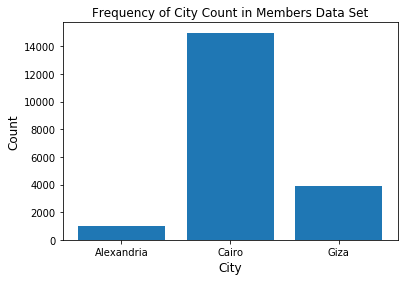

In [124]:
#currency

## just format this chart to plot the top 3 cities .. then cont. with the insights .. 

plt.bar(top_cities.keys(), top_cities.values())

plt.ylabel('Count', fontsize=12)
plt.xlabel('City', fontsize=12)
plt.title("Frequency of City Count in Members Data Set", fontsize=12)

## 4. Creating Dashboard: 

Dashboard is created in a seperate excel sheet ..  

## 5. Listing of Set of Insights:
Up on the above analysis and based on the created excel dashboard .. 

We might conclude with the below set of insights:
1. WUZZUF dataset contains 3 job categories 
         1.1. "IT/ Software Development" has the maximum number of views in the 1st category
         1.2. "Select" has the maximum number of views in the 2nd and 3rd categories
2. "Graphic Designer" is the most frequent job title 
3. The job title that has maximum salary is "Sales Manager" 
4. The highest average creer level salary goes to "Senior Management (i.e. CEO)"

## 6. Limitations:
If I have enough time .. I'd complete the following .. 
1. More data cleaning for "City" variables (i.e. split it and plot it to check the number of posts related to each city) 
2. More data cleaning for "Job title" variable .. It still contains un-clear (i.e. typo) cells clearly appear in the excel sheet .. 
3. Create a more interactive dashboard on (Plotly) or Tableau ..  
4. Create more charts related to (deviation) of some indicators wit respect to time (i.e. years) 